## Linear Regression Theory

In [1]:
# Target:
    # Try to learn from labelled data the unlabeled data
    # Minimize sum of squared errors(, or any other metric for regression like sum of absolure errors, etc)

In [2]:
# Regression:
    # Comes from " A father's son's height tends to regress (or drift toward)the mean(average)height of people"
# Least Squares Method(classic linear regression):
    #You only measure the closeness in up & down direction
    # It minimizes the sum of squares of the residuals(vertical).

# Linear Regression ex


# Preprocessing

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv('USA_Housing.csv')

In [9]:
df.head()
    # It's divided into features, price, and address

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
df.info()
    # Gives you a preview on number of rows, columns, and type of objects in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [15]:
df.describe()
    # Gives you some important numerical data about your dataframe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [16]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

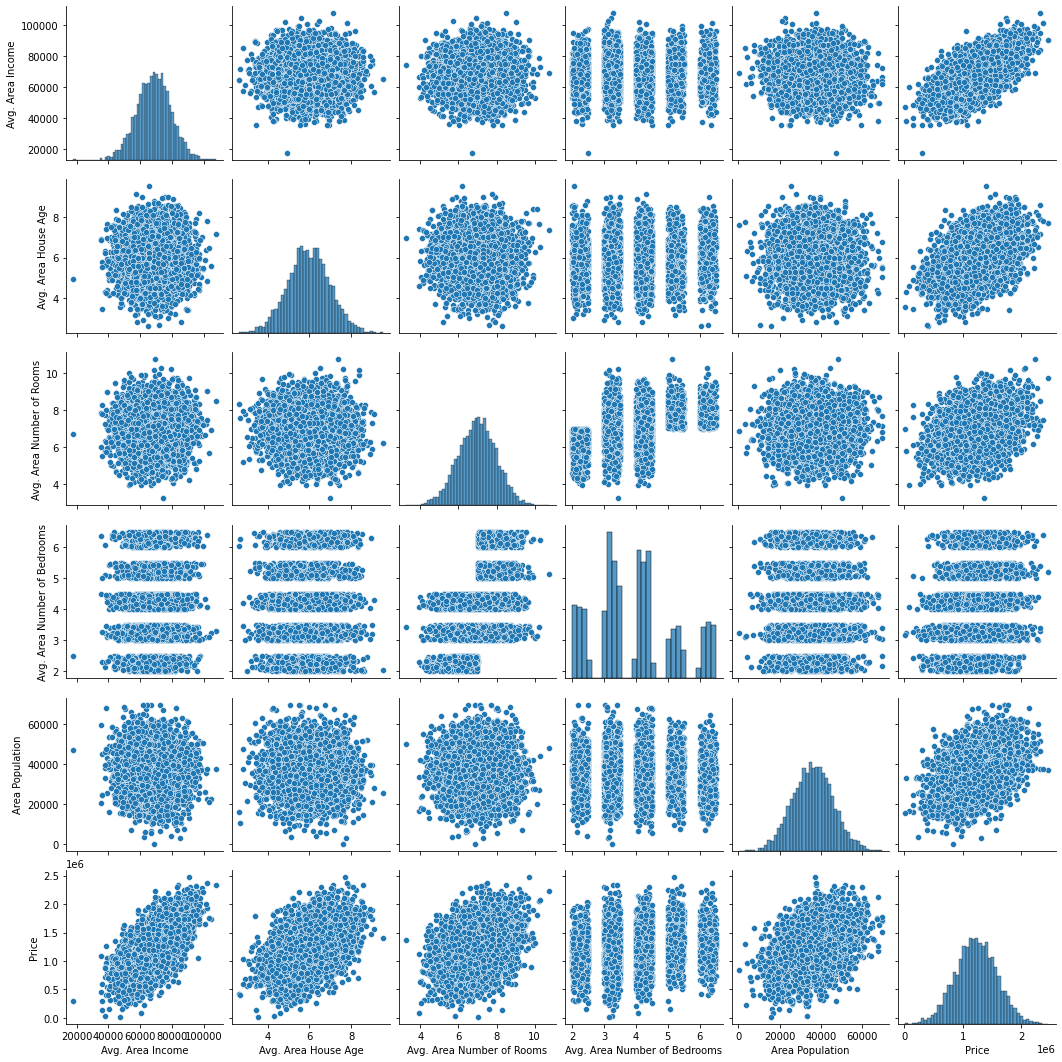

In [17]:
sns.pairplot(df)
    # You can see that every column is normally distributed
    # number of rooms won't be normal as you can't find a 2.5 room
    #

<AxesSubplot:xlabel='Price', ylabel='Count'>

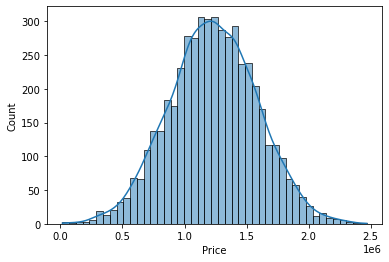

In [22]:
sns.histplot(df['Price'],kde=True)
    # Show what your want to know the average

In [24]:
df.corr()
    # Shows the correlation between each of the column

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

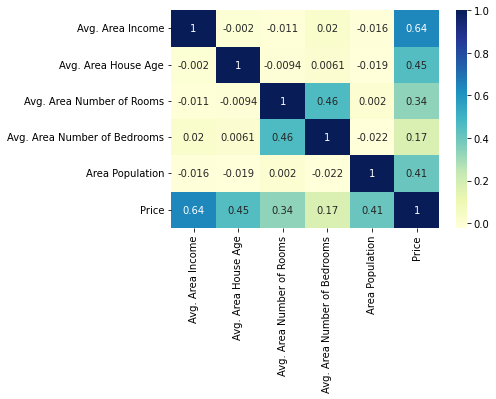

In [34]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

# Split the data

In [36]:
# Split the data into train, and test dependeing on target column

In [37]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [44]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
    # Those are my features
    # I will cast away the address, as I can't use it without NLP

In [45]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [46]:
y=df['Price']

In [47]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.4,random_state=101)
    # random_state to make your value is the same, as the instructor

<font size="4px" color="red">Train the model</font>

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lm=LinearRegression()
    # To create an linear regression object
    # In programming, instantiation is the creation of a real instance or particular realization of an abstraction or template such as a class of object s or a computer process.

In [69]:
lm.fit(X_train,y_train)
    # It takes X,y and then fit the model parameters

LinearRegression()

In [70]:
print(lm.intercept_)
    # In a linear equation, the intercept is the point at which the line crosses the y-axis

-2640159.7968526953


In [72]:
lm.coef_
    # It will show the theta for each freatrue

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [73]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [78]:
cdf=pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])
    # columns=['Coeff']: to name the columns

In [106]:
cdf
    # If any theta value is negative means the increase means a decrease in target

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


<font size="6px" color="blue">Prediction </font>


In [137]:
predictions=lm.predict(X_test)
    # You pass on data X that the model has never seen before

In [138]:
predctions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140898, 1914519.5417888 ])

In [144]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

<font size="6px" color="blue">Evaluation</font>

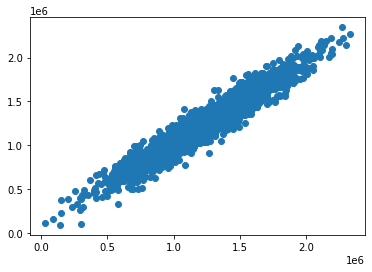

In [156]:
plt.scatter(y_test,predctions)
    # To visualize the difference

<AxesSubplot:xlabel='Price', ylabel='Count'>

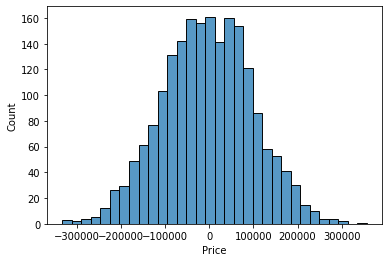

In [153]:
sns.histplot((y_test-predctions))
    # To visualize the residual(actual-predictiona)
    # If the residual is normal dist, it means your model was a good choice

In [157]:
from sklearn import metrics

In [158]:
metrics.mean_absolute_error(y_test,predctions)

82288.22251914942

In [159]:
metrics.mean_squared_error(y_test,predctions)

10460958907.20898

In [160]:
np.sqrt(metrics.mean_squared_error(y_test,predctions))

102278.82922290899

# Boston city Dataset ex
   It's a dictionary not a dataframe with all data is divided into keys

<font size="5px" color="blue">Import data</font>

In [87]:
from sklearn.datasets import load_boston

In [86]:
boston=load_boston()

In [95]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [108]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [111]:
X1=pd.DataFrame(boston['data'],columns=boston['feature_names'])

In [112]:
X1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [113]:
y1=pd.DataFrame(boston['target'])

In [114]:
y1

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


# Split the data

In [103]:
from sklearn.model_selection import train_test_split

In [115]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.3)

# Train the model

In [118]:
lm1=LinearRegression()

In [119]:
lm1.fit(X1,y1)

LinearRegression()

In [128]:
lm1.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [133]:
theta_boston=pd.DataFrame(lm1.coef_.reshape(13,1),X_train1.columns,columns=['Theta'])

In [134]:
theta_boston

,Theta
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


# Getting prediction

In [161]:
predictions1=lm1.predict(X_test1)

In [163]:
predictions1

array([[17.28601894],
       [20.23274414],
       [22.91502612],
       [14.05573285],
       [15.96090435],
       [16.88541964],
       [12.97948781],
       [14.25756243],
       [21.59260894],
       [22.1667232 ],
       [38.79756966],
       [20.55738556],
       [20.42320032],
       [10.89016778],
       [18.58838397],
       [ 9.71844139],
       [28.40576968],
       [30.28934141],
       [21.17418105],
       [27.94352423],
       [17.29558059],
       [17.74061065],
       [13.36660811],
       [19.65591961],
       [29.08105546],
       [44.67308339],
       [22.64829115],
       [24.7664781 ],
       [23.69043261],
       [29.11309844],
       [17.81174507],
       [33.88787321],
       [13.06591313],
       [20.61249414],
       [36.77467015],
       [18.30101169],
       [21.91632071],
       [37.20347455],
       [23.28133979],
       [23.58965827],
       [37.07148392],
       [20.12282558],
       [21.7426577 ],
       [31.91054611],
       [27.09887315],
       [21

<font size="5px" color='blue'> Evaluate Boston</font>


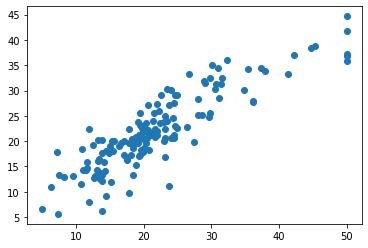

In [164]:
plt.scatter(y_test1,predictions1)

<AxesSubplot:ylabel='Count'>

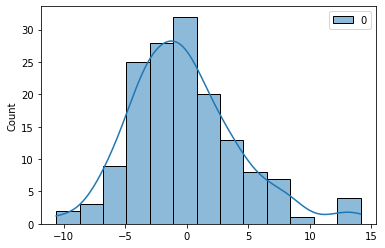

In [166]:
sns.histplot((y_test1-predictions1),kde=True)

In [167]:
from sklearn import metrics

In [170]:
metrics.mean_absolute_error(y_test1,predictions1)

3.3620667670192965

In [171]:
metrics.mean_squared_error(y_test1,predictions1)

19.28549339597483

In [173]:
np.sqrt(metrics.mean_squared_error(y_test1,predictions1))

4.391525178793221

<font color='red' size='5px'> Bias Variance Trade-off</font>

    It's when we add more noise by adding model complexity. The model overfit, and the test error increase with a decrease in training error.

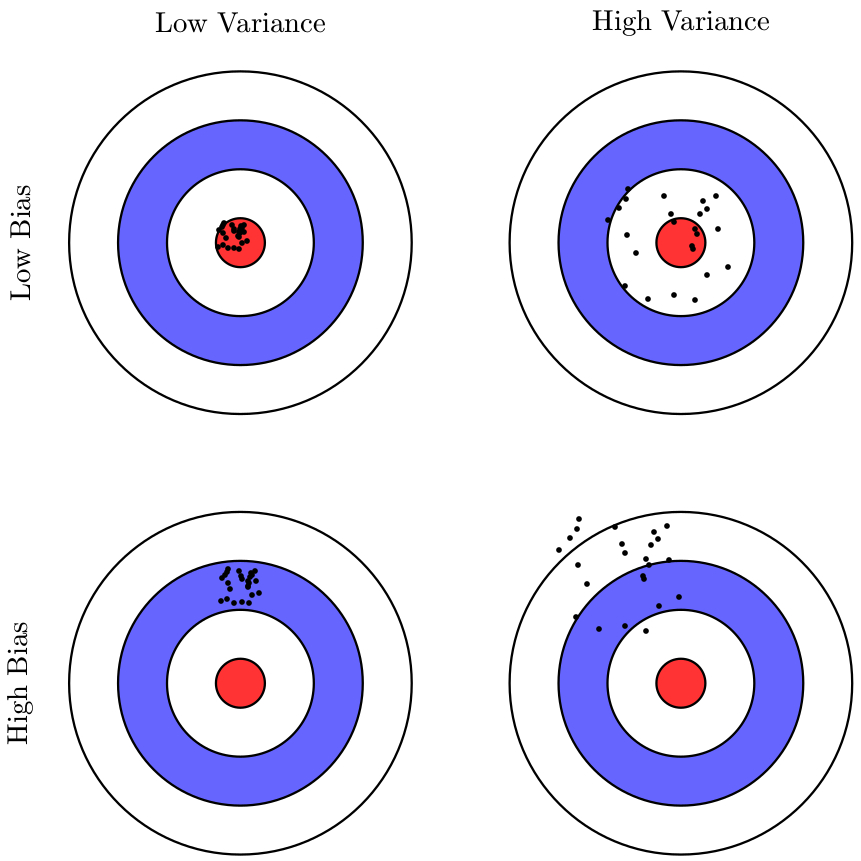

In [179]:
from IPython.display import Image
Image(filename='ic4Q8.jpg')
    # here you can see that variance cause a variation around the target, while bias cause a shift from target

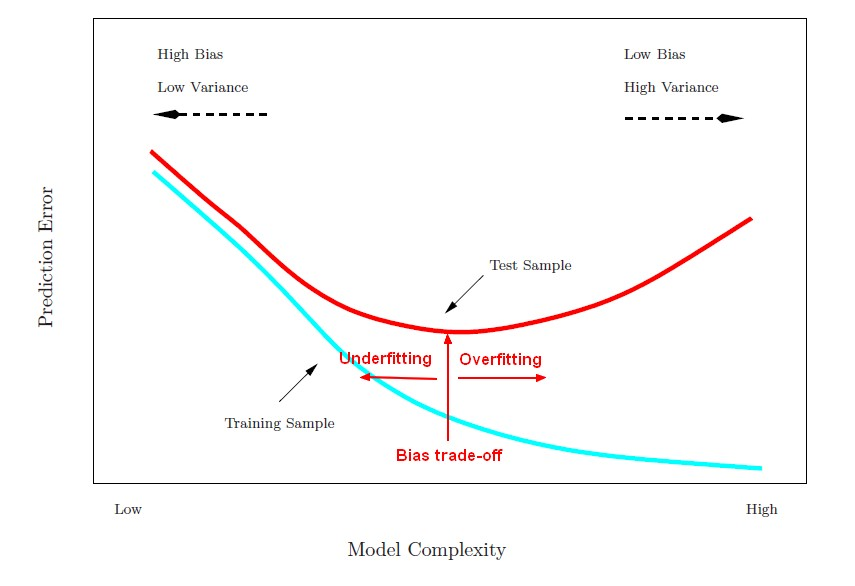

In [178]:
from IPython.display import Image
Image(filename='model_complexity_error_training_test.jpg')
    # We are going to focus on decreasing the d if high variance, or increase it if high bias. 
    # Keep in mind, that the metrics of prediction is our reference